# TP Neural Networks for Regression
Polytech SI4

Diane Lingrand Diane.Lingrand@univ-cotedazur.fr

2022-2023

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras
import math
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from sklearn.model_selection import train_test_split

/Users/ozeliurs/Desktop/Polytech/EIIN726/labs/TD7/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Neural network as a function approximator

In this first part, your goal is to learn the following mathematical function from samples and using a neural network. The code provided in this section will help you to start. This code is running with errors but the quality of the result is poor. Your goal is to improve this code.

In [3]:
def myFunction(x):
    return 0.6+2*(x+2*(x*10)**2-(x*10)**3)*math.exp(-x*10)

### generation of the dataset (samples from 'myFunction')

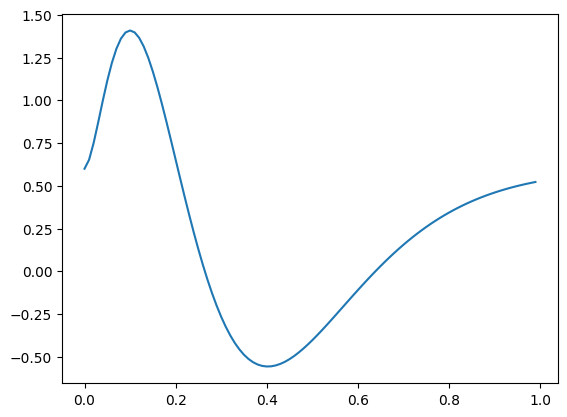

In [4]:
nbData = 100
x=[i/nbData for i in range(nbData)]
y = [myFunction(i) for i in x]
plt.plot(x,y)

In [5]:
# split train/test
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.4)

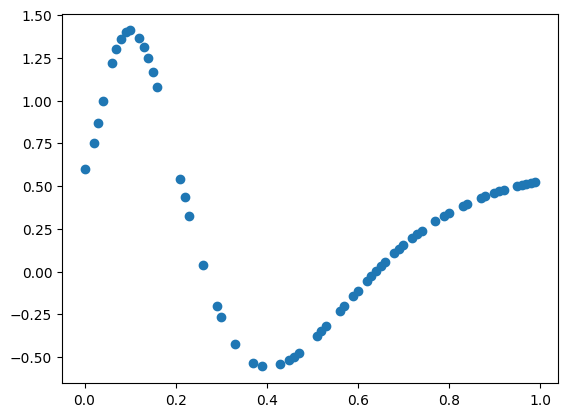

In [6]:
#draw the samples from the training set
plt.scatter(xTrain,yTrain)

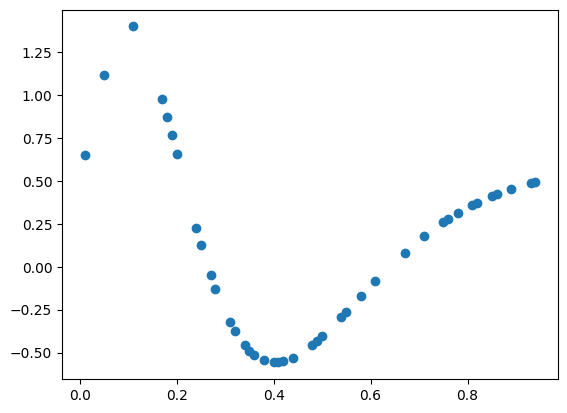

In [7]:
# and the test dataset
plt.scatter(xTest,yTest)

### the neural network

In [8]:
#topology
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='rmsprop',loss='mse')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
#learning
model.fit(xTrain, yTrain, epochs=20000, batch_size=128)


Epoch 1/20000
1/1 [==============================] - 0s 312ms/step - loss: 0.4307
Epoch 2/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.4284
Epoch 3/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.4267
Epoch 4/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.4254
Epoch 5/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.4242
Epoch 6/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.4231
Epoch 7/20000
1/1 [==============================] - 0s 5ms/step - loss: 0.4221
Epoch 8/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.4212
Epoch 9/20000
1/1 [==============================] - 0s 5ms/step - loss: 0.4204
Epoch 10/20000
1/1 [==============================] - 0s 5ms/step - loss: 0.4195
Epoch 11/20000
1/1 [==============================] - 0s 5ms/step - loss: 0.4188
Epoch 12/20000
1/1 [==============================] - 0s 5ms/step - loss: 0.4180
Epoch 13/20000
1/1 [===============

In [11]:
# evaluation of performance
yTrainPred = model.predict(xTrain)
yTestPred = model.predict(xTest)
score = model.evaluate(xTest,yTest)
print("score = %.2f" % (score))

2/2 [==============================] - 0s 2ms/step - loss: 0.1123
score = 0.11


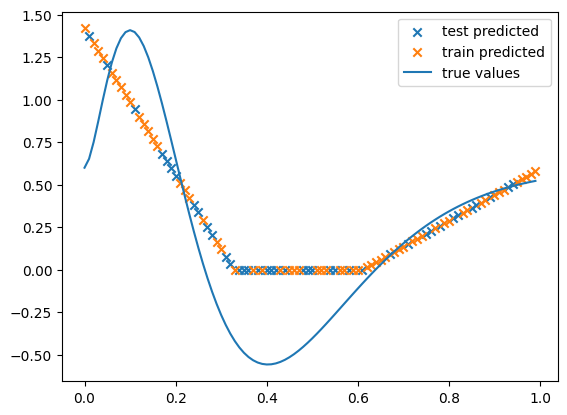

In [12]:
# we plot the true values and the prediction
plt.scatter(xTest,yTestPred, marker='x', label='test predicted')
plt.scatter(xTrain,yTrainPred, marker='x',label='train predicted')
plt.plot(x,y, label='true values')
plt.legend()

Looking at this picture, you may see that both predictions from train or test are bad. You can improve this by answering to these questions:
- do you have enough data ? too much ?
- is the topology of the neural network too simple ? too complex ? 
- are the parameters of the neural network well chosen ?
- did stop the network too early (not converged) or too late (overfitting)?


## Regression using a toy dataset: diabetes

Your goal is to improve the results obtained with linear regression !

In [ ]:
# your work